In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#Text Preprocessing
import re
import string
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

#Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

'unzip' is not recognized as an internal or external command,
operable program or batch file.


# Loading Dataset

In [42]:
df = pd.read_csv(r'D:\AVRP\4projecs\plant\Flask Deployed App\reviews_0_250.csv')
df

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602125,602125,7446977307,5,1.0,1.0,12,0,12,2020-12-17,I can’t say enough great things about this pro...,HOLY GRAIL- lash extension safe!!,fair,green,dry,blonde,P467602,Triple Algae Eye Renewal Balm Eye Cream,Algenist,68.0
602126,602126,1991973234,5,1.0,1.0,4,0,4,2020-12-17,I have been using this product for over 6 week...,Game changer!,mediumTan,brown,combination,black,P467602,Triple Algae Eye Renewal Balm Eye Cream,Algenist,68.0
602127,602127,1339171721,5,1.0,1.0,10,0,10,2020-12-17,I love the Triple Algae Eye Renewal Balm! Once...,Triple Algae Eye Renewal Balm is a MUST HAVE,light,hazel,dry,brown,P467602,Triple Algae Eye Renewal Balm Eye Cream,Algenist,68.0
602128,602128,1917233409,5,1.0,1.0,5,0,5,2020-12-17,This made the lines around my eyes so much bet...,NaN,lightMedium,hazel,combination,brown,P467602,Triple Algae Eye Renewal Balm Eye Cream,Algenist,68.0


In [44]:
df.shape

(602130, 19)

# Data Cleaning and EDA

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                602130 non-null  int64  
 1   author_id                 602130 non-null  object 
 2   rating                    602130 non-null  int64  
 3   is_recommended            484644 non-null  float64
 4   helpfulness               270298 non-null  float64
 5   total_feedback_count      602130 non-null  int64  
 6   total_neg_feedback_count  602130 non-null  int64  
 7   total_pos_feedback_count  602130 non-null  int64  
 8   submission_time           602130 non-null  object 
 9   review_text               601131 non-null  object 
 10  review_title              435119 non-null  object 
 11  skin_tone                 496074 non-null  object 
 12  eye_color                 463642 non-null  object 
 13  skin_type                 527447 non-null  o

In [46]:
df.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

As We have to do sentiment analysis, we only need two columns. So, we will drop rest of the columns.

In [47]:
df.drop([ 'author_id', 'rating', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'], axis=1, inplace=True)

In [48]:
df.head()

,Unnamed: 0,is_recommended,review_text
0,0,1.0,I use this with the Nudestix “Citrus Clean Bal...
1,1,0.0,I bought this lip mask after reading the revie...
2,2,1.0,My review title says it all! I get so excited ...
3,3,1.0,I’ve always loved this formula for a long time...
4,4,1.0,"If you have dry cracked lips, this is a must h..."


In [49]:
df.isnull().sum()

Unnamed: 0             0
is_recommended    117486
review_text          999
dtype: int64

In [50]:
df.dropna(axis=0, inplace=True)

In [51]:
df.duplicated().sum()

0

In [52]:
df.drop_duplicates(keep='first', inplace=True)

In [53]:
df.columns

Index(['Unnamed: 0', 'is_recommended', 'review_text'], dtype='object')

In [54]:
df['is_recommended'].value_counts()

1.0    405235
0.0     78410
Name: is_recommended, dtype: int64

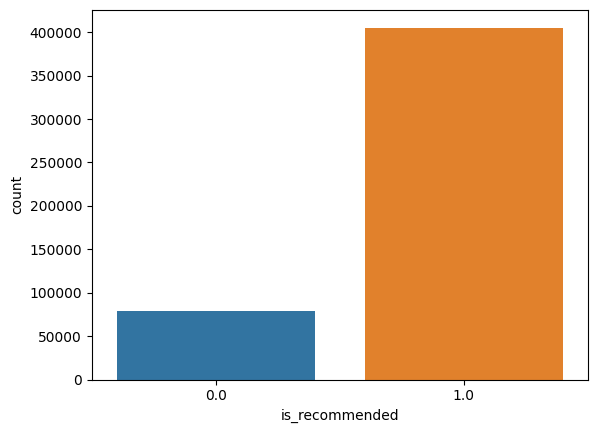

In [55]:
sns.countplot(x=df['is_recommended'])
plt.show()

# Text Preprocessing

In [56]:
#Let's define a function to preprocess text
def clean_text(text):
    stop = stopwords.words('english')       
    punc = list(punctuation)
    bad_tokens = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text)
    word_tokens = [t for t in tokens if t.isalpha()]
    clean_token = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_token)

In [57]:
df['text'] = df['review_text'].apply(clean_text)
allwords = ' '.join(word for word in df['text'])

# Word Cloud

In [58]:
allwords = ' '.join(word for word in df['text'])

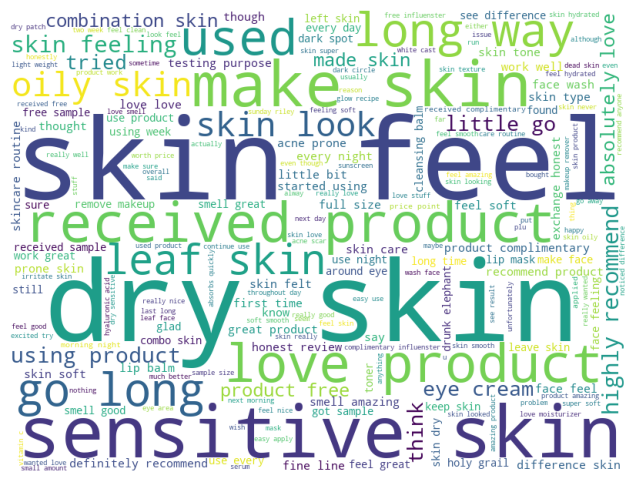

In [59]:

wordcloud = WordCloud(
    width = 800,
    height = 600,
    background_color = 'white').generate(allwords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Model Building

In [60]:
# Rename the columns
df.rename(columns={'is_recommended':'label'},  inplace=True)

pos = df[df['label'] == 1].sample(10000)
neg = df[df['label'] == 0].sample(10000)

# Concat pos and neg label
df = pd.concat([pos,neg],axis=0)
df.shape

(20000, 4)

In [61]:

df['text']

186922    keep lip plump moisturized the smell pear flav...
40358     i genuinely love product i tell difference ski...
547668    instant different sin fragile skin eye i smile...
253623    i oily skin i decided try morning moisturizer ...
476976                                 this product amazing
                                ...                        
541984    i put sunscreen around min i went outside star...
129822    may work oily skin hormonal acne absolutely no...
383182    maybe heavy skin sink my face felt looked supe...
246855    firstly i surprised large actually the balm ni...
489215    it thin absorbs nicely moisturizing experience...
Name: text, Length: 20000, dtype: object

In [62]:
df['label']

186922    1.0
40358     1.0
547668    1.0
253623    1.0
476976    1.0
         ... 
541984    0.0
129822    0.0
383182    0.0
246855    0.0
489215    0.0
Name: label, Length: 20000, dtype: float64

In [63]:
X = df['text']
y = df['label']

In [64]:



vec = TfidfVectorizer()
X = vec.fit_transform(X).toarray()

In [83]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [66]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred = model.predict(X_test)

In [68]:
#Creating a function to display model results
def evaluation_parametrics(name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    t1.plot()

Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1981
         1.0       0.90      0.85      0.87      2019

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000



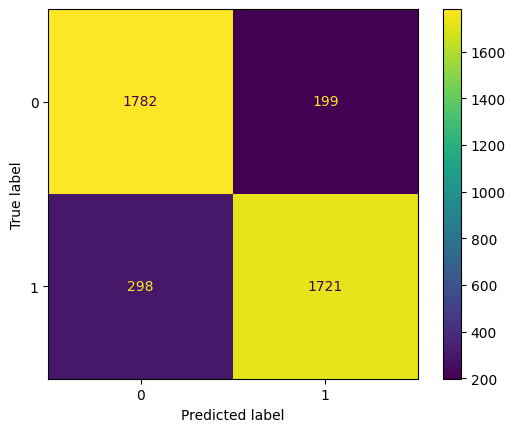

In [69]:
#Visualizing model results
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

**Naive Bayes**

In [70]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [71]:
y_pred = model.predict(X_test)

In [72]:
#Creating a function to display model results
def evaluation_parametrics(name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    t1.plot()

Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1981
         1.0       0.87      0.86      0.86      2019

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000



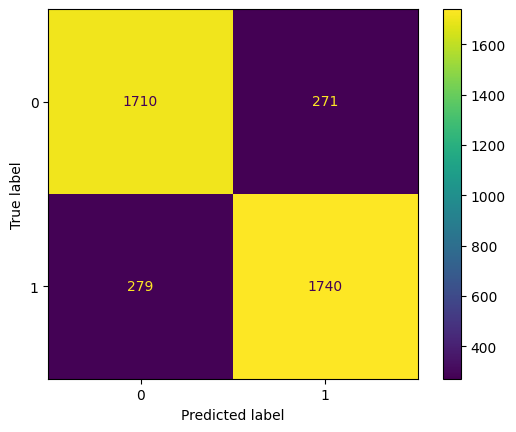

In [73]:
#Visualizing Model Results
evaluation_parametrics("Machine Learning Classification", y_test, y_pred)

**Random Forest**

In [74]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
y_pred = model.predict(X_test)

In [85]:
import joblib
# Save the model to a file
joblib.dump(model, 'modelsk.joblib')


['modelsk.joblib']

In [77]:
#Creating a function to visualize model results
def evaluation_parametrics(name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print("Classification Report for Random Forest Classifier: \n")
    print(classification_report(y_test, y_pred))
    t1.plot()

Classification Report for Random Forest Classifier: 

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1981
         1.0       0.86      0.84      0.85      2019

    accuracy                           0.85      4000
   macro avg       0.85      0.85      0.85      4000
weighted avg       0.85      0.85      0.85      4000



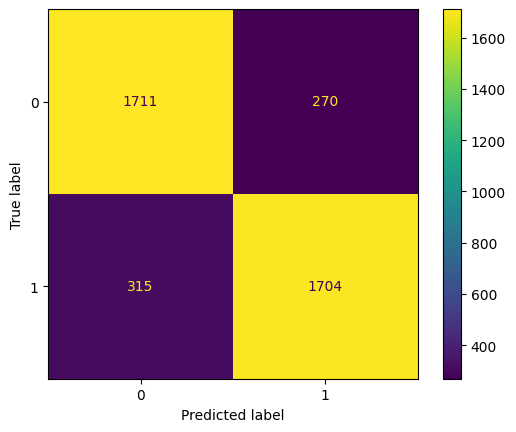

In [78]:
#Visualizing Model Results
evaluation_parametrics('Machine Learning Classification', y_test, y_pred)

# Thankyou for coming down this far!!